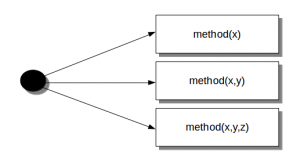

Given a class (the dark dot), it has three methods accepting different number of arguments

Depending on the function definition, it can be called with zero, one, two or more parameters.

In [11]:
class Dot:
    def __init__(self):
        pass
    
    def method(self,x):
        print('method(self,x) got called')
    
    def method(self,x,y):
        print('method(self,x,y) got called')
        
    def method(self, x,y,z):
        print('method(self,x,y,z) got called')


You cant actually overload functions and methods in Python, if you try to do as in the above example, the last method you defined method(x,y,z) is picked by Python to be used. Below is the proof:

In [12]:
dot = Dot()

dot.method(1)  # pass 1 for x, do not give any arguments for y and z in an attempt to call method(self, x)

TypeError: method() missing 2 required positional arguments: 'y' and 'z'

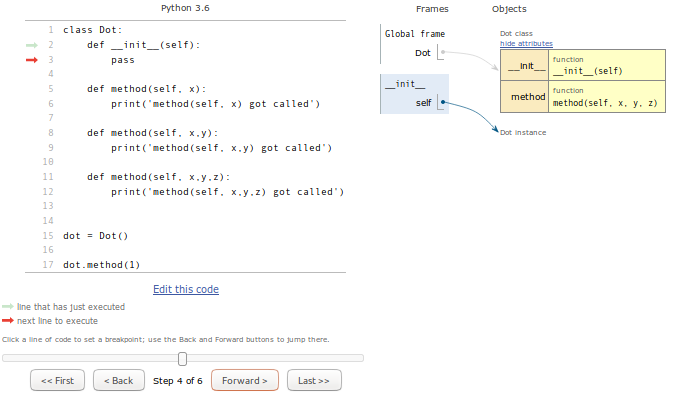

As you see in the above picture, Python only recorded method(self,x,y,z) method of Dot class. The other two methods method(self,x) and method(self,x,y) are ignored

So, how can we call Dot.method in an overloaded fashion? By making all arguments having default values and calling the method with any number of arguments we like:

In [17]:
class Dot:
    def __init__(self):
        pass
        
    def method(self,x=0,y=0,z=0):
        print(f'method(self,x,y,z) got called with x:{x}, y:{y}, z:{z}')

In [19]:
dot = Dot()
# below given a series of calls to method, which "looks like" a method overloading from client perspective. But
# all these methods call the same method in Dot class.
dot.method()
dot.method(x=2)
dot.method(x=2,y=3)
dot.method(x=2,y=3,z=4)

method(self,x,y,z) got called with x:0, y:0, z:0
method(self,x,y,z) got called with x:2, y:0, z:0
method(self,x,y,z) got called with x:2, y:3, z:0
method(self,x,y,z) got called with x:2, y:3, z:4


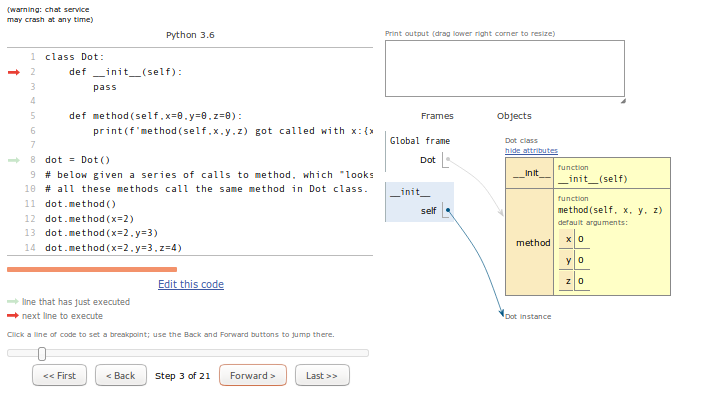

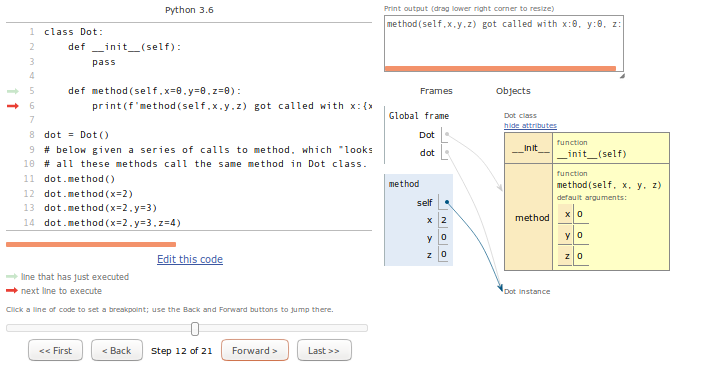

## Inheritance: base class with init function gets called directly when derived class init function is not defined

In [20]:
class Enemy:
    """ You cant actually overload functions and methods in Python, but you can get the same effect
    of calling different overloaded methods by using named parameters with default values (i.e. name, enemy,
    hit_points below). Refer to main.py on how to create Trolls by passing different arguments"""
    def __init__(self, name="Enemy", hit_points=0, lives=1):  # optional named parameters in __init__ method
        self.name = name
        self.hit_points = hit_points
        self.lives = lives

    def take_damage(self, damage):
        remaining_points = self.hit_points - damage
        if remaining_points >= 0:
            self.hit_points = remaining_points
            print(f'I took {damage} points and have left {self.hit_points} left')
        else:
            self.lives -= 1

    def __str__(self):
        return f'Name: {self.name}, Lives: {self.lives}, hit points: {self.hit_points}'


class Troll(Enemy):
    pass

In [21]:
ugly_troll = Troll('Pug')  # note that it takes no arguments. Calls Enemy.__init__
print('Ugly troll - {}'.format(ugly_troll))

another_troll = Troll('Ug', 8, 2)  # note that it takes 3 arguments. Calls Enemy.__init__
print(f'Another troll {another_troll}')

brother_troll = Troll('Urg', 23)  # note that it takes 2 arguments. Calls Enemy.__init__
print(f'Brother troll {brother_troll}')

Ugly troll - Name: Pug, Lives: 1, hit points: 0
Another troll Name: Ug, Lives: 2, hit points: 8
Brother troll Name: Urg, Lives: 1, hit points: 23


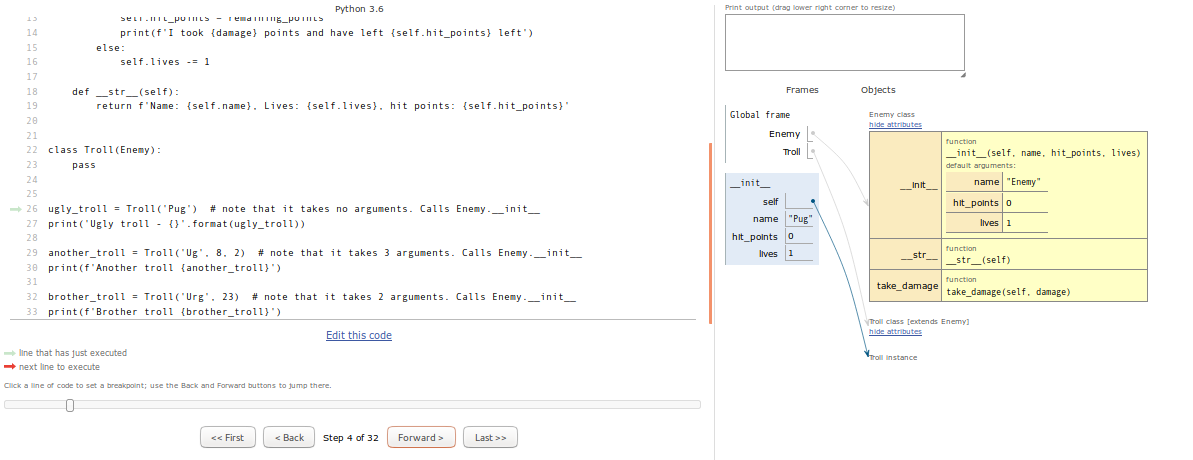

When Pug Troll gets initialized in the Enemy.__init__  function:

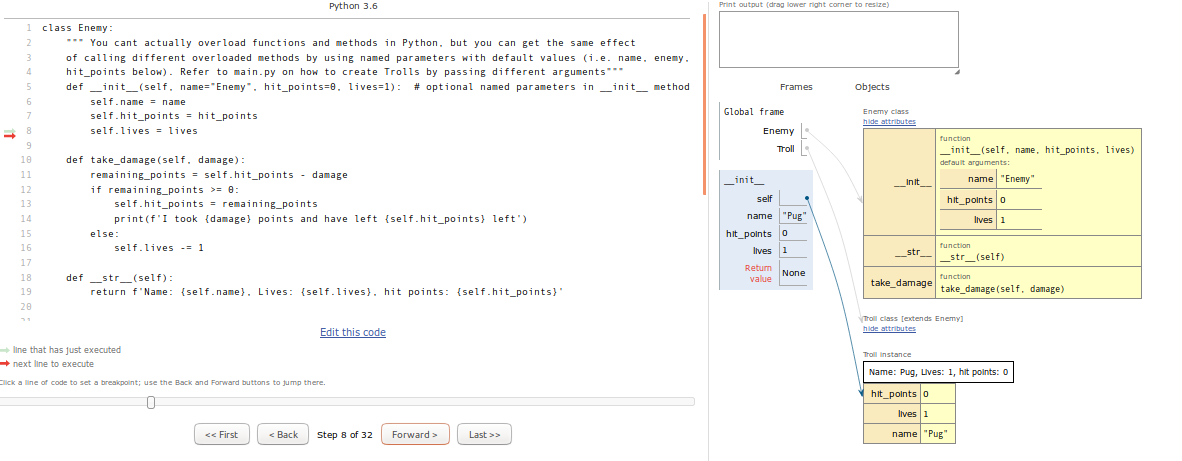

Note that 2.nd troll "Ug" gets created, we pass in 3 arguments to the constructor Enemy.__init__

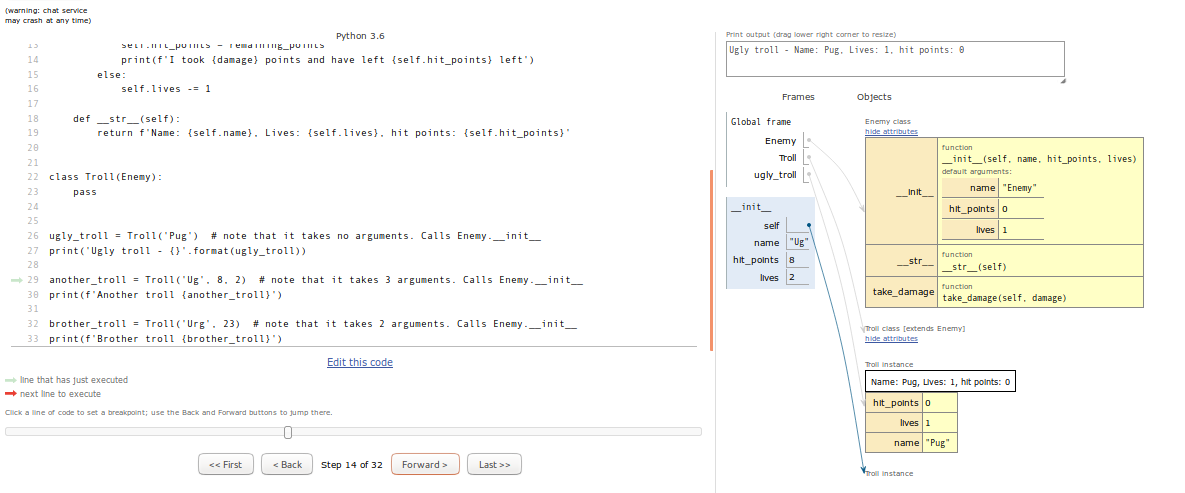

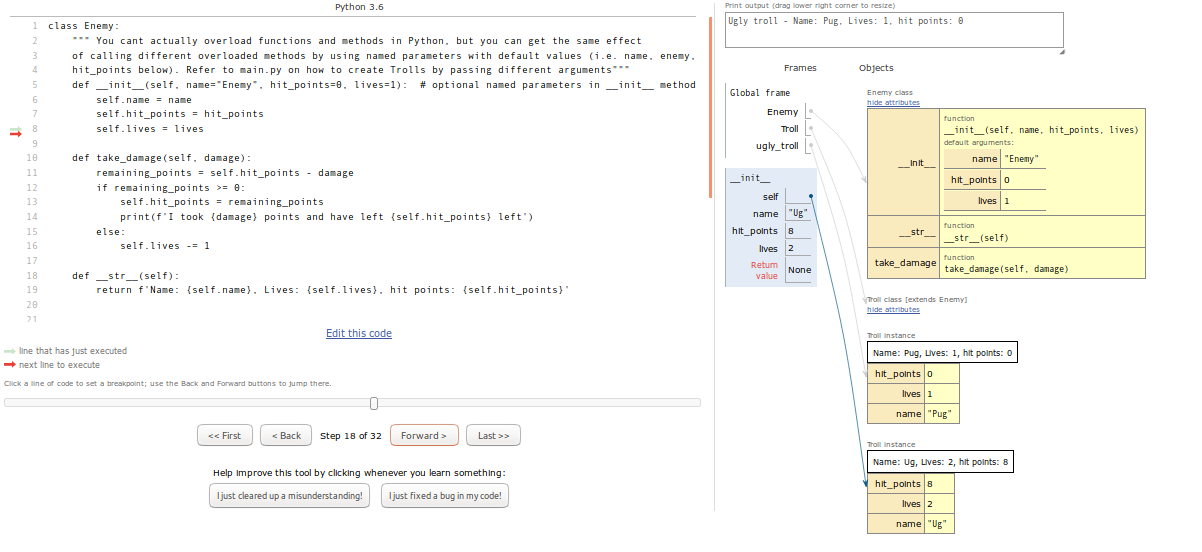

And similarly the third Trol gets initiated using 2 arguments:

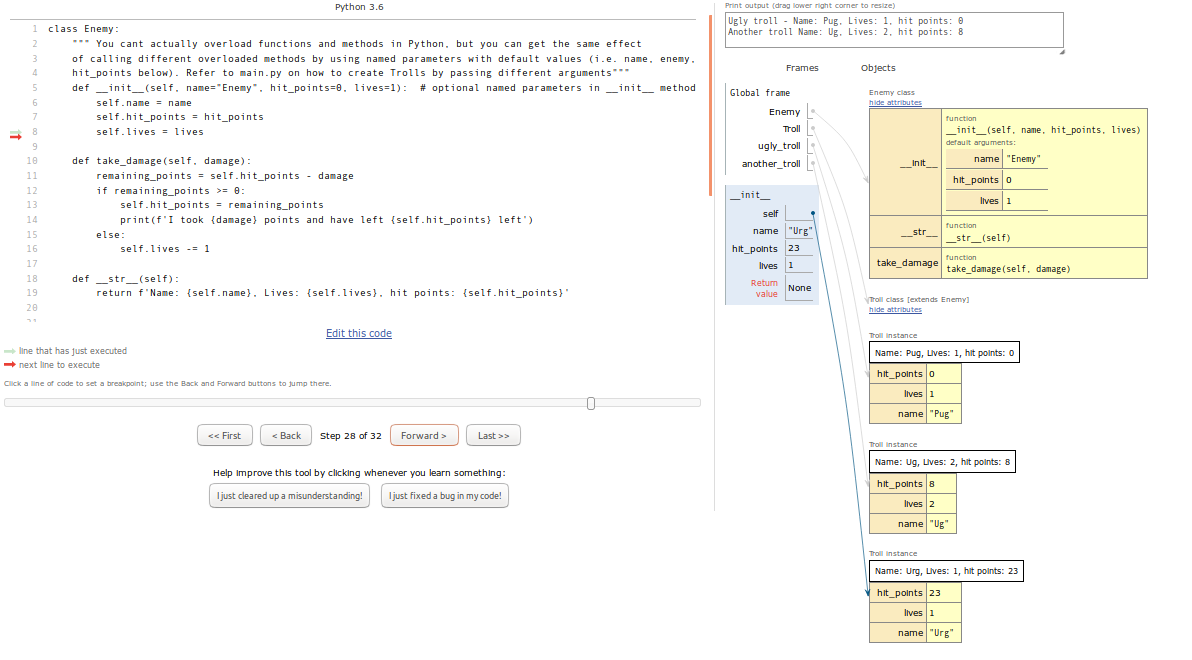

The takeaway here is eeven though the client code looks like it is calling different init methods in base class, it actually does not. **You CANT actually overload functions and methods in Python**, but you can get the same **effect of calling different overloaded methods** by using parameters with default values (i.e. name, lives,
hit_points above)